# Giro Volante

Example scatterplots with Formula 1 data from
https://ergast.com/mrd/db

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

from etl import DATADIR, ErgastF1
from viz import Plot

f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

Autosave disabled


## How fast are the cars compared to previous years?
Get fastest lap for each (year, circuit, driver) when available.

In [2]:
fastlaps = (
    f1.results.dropna(subset=['fastlap_kph'])
    .rename(columns={'fastlap_kph': 'kph'})
    .join(f1.races['season id_circuit'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.teams['team'], on='id_team')
    ['season circuit team fastlap kph'.split()]
    .sort_values('season circuit kph'.split())
    .reset_index(drop=True)
)
fastlaps

,season,circuit,team,fastlap,kph
0,2004,Albert Park Grand Prix Circuit,Minardi,8,210.666
1,2004,Albert Park Grand Prix Circuit,Minardi,10,211.741
2,2004,Albert Park Grand Prix Circuit,Jordan,15,215.659
3,2004,Albert Park Grand Prix Circuit,McLaren,7,217.098
4,2004,Albert Park Grand Prix Circuit,Jaguar,6,217.336
...,...,...,...,...,...
6217,2019,Yas Marina Circuit,Red Bull,55,197.731
6218,2019,Yas Marina Circuit,Ferrari,44,199.064
6219,2019,Yas Marina Circuit,Ferrari,55,199.688
6220,2019,Yas Marina Circuit,Mercedes,31,200.515


## full service
Before 2010, cars were allowed to refuel at pit stops.

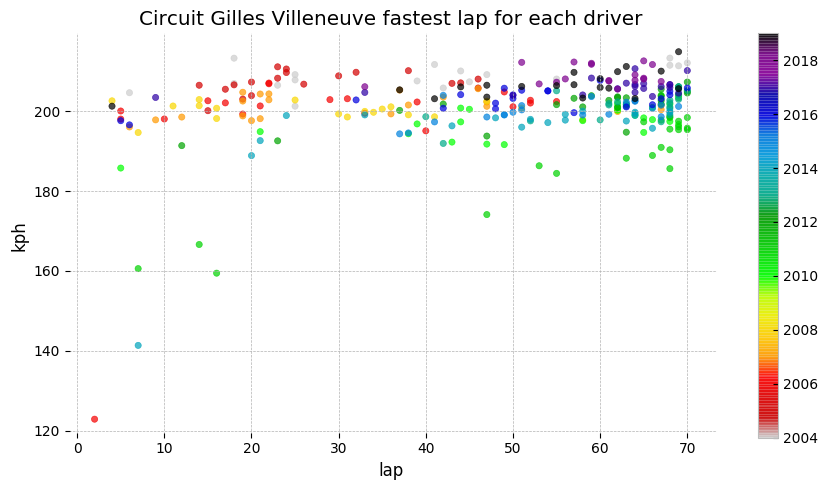

In [3]:
def lapdots(circuit, **kwargs):

    data = fastlaps.loc[lambda df: df['circuit'].eq(circuit)]
    data = data['fastlap kph season'.split()]
    
    kwset = kwargs.setdefault
    kwset('colorbar', True)
    kwset('title', f"{circuit} fastest lap for each driver")
    kwset('xlabel', 'lap')
    kwset('ylabel', 'kph')
    plot.scatter(data, **kwargs)

lapdots('Circuit Gilles Villeneuve')

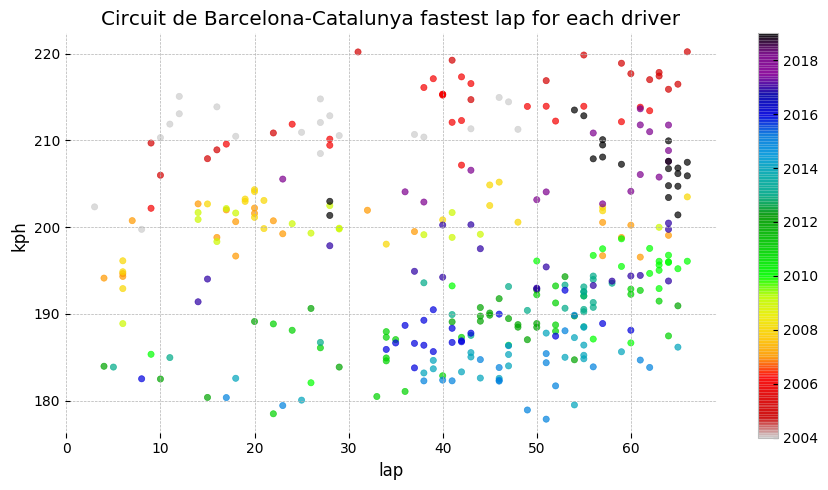

In [4]:
lapdots('Circuit de Barcelona-Catalunya')

## velocità d'Italia
The 2008 Italian GP was run in wet conditions.

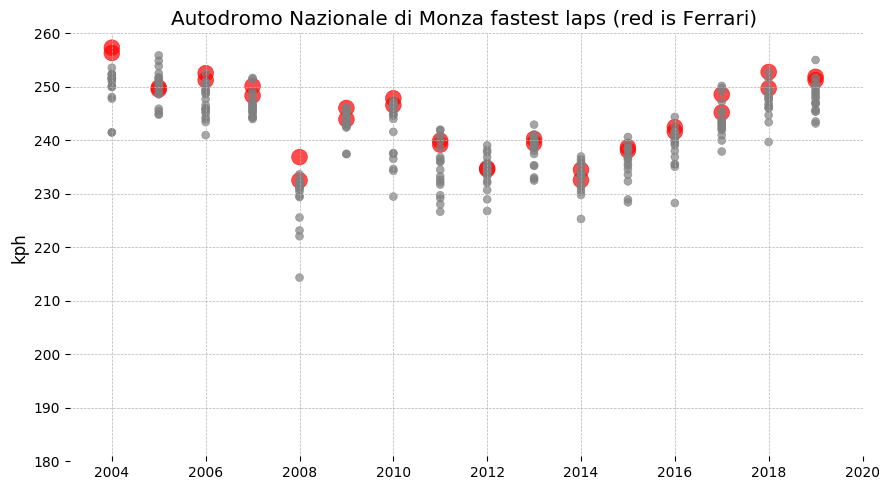

In [5]:
def teamdots(circuit, team, color, **kwargs):

    data = fastlaps.loc[lambda df: df['circuit'].eq(circuit)]
    data = data['season kph team'.split()]
    data['color'] = data['team'].map({team: color}).fillna('grey')
    data['size'] = 32 + 96 * data['team'].eq(team)
    data = data.sort_values('size', ascending=False)
    data.pop('team')
    
    kwset = kwargs.setdefault
    kwset('title', f"{circuit} fastest laps ({color} is {team})") 
    kwset('ylabel', 'kph')
    kwset('xlim', (2003, 2020))
    kwset('ylim', (180, 260))
    axes = plot.scatter(data, **kwargs)

teamdots('Autodromo Nazionale di Monza', 'Ferrari', 'red')

## moulin rose

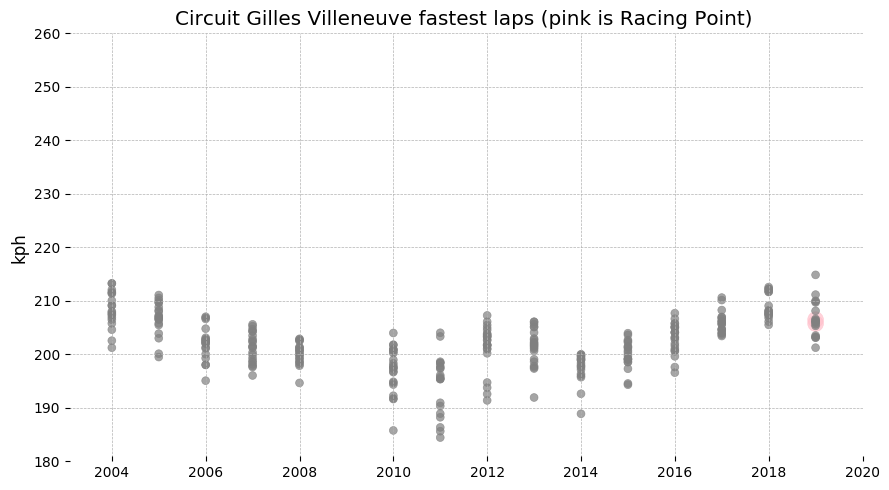

In [6]:
teamdots('Circuit Gilles Villeneuve', 'Racing Point', 'pink')

## lauf der stiere

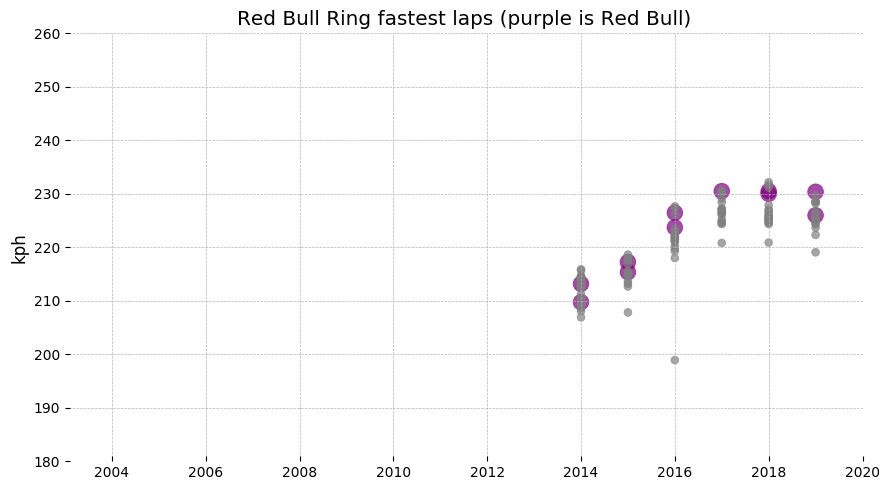

In [7]:
teamdots('Red Bull Ring', 'Red Bull', 'purple')

## geschwindigkeitheim

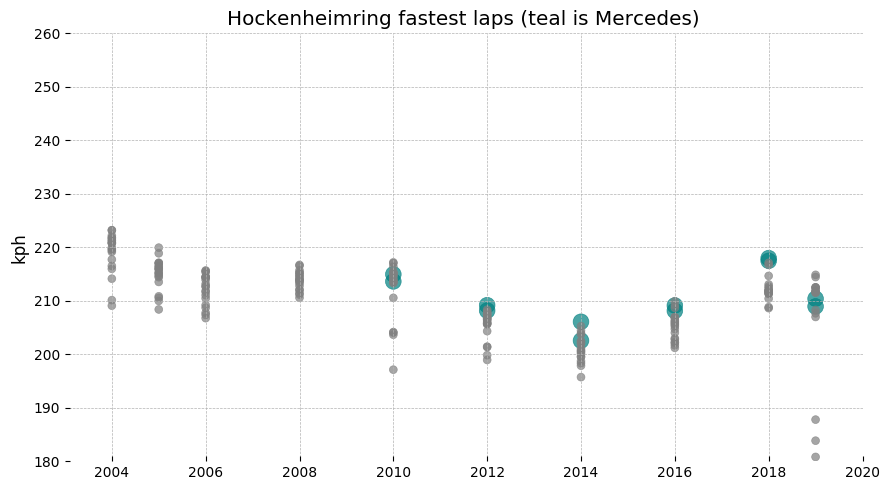

In [8]:
teamdots('Hockenheimring', 'Mercedes', 'teal')